In [1]:
!pip install ucimlrepo
!pip install scikit-learn

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.svm import SVR
from ucimlrepo import fetch_ucirepo

In [28]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

In [29]:
# Dividir los datos en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Escalar los datos
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [45]:
# Asegurarse de que y_train_reg y y_test_reg sean vectores unidimensionales
y_train_reg = y_train_reg.values.ravel()
y_test_reg = y_test_reg.values.ravel()


In [79]:
# Crear el modelo SVM de regresión
model = SVR(C=0.6, kernel='rbf', gamma='auto',epsilon=0.3)
# Entrenar el modelo
model.fit(X_train_reg, y_train_reg)
# Realizar las predicciones
y_pred_reg = model.predict(X_test_reg)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularización
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Parámetro del kernel
    'epsilon': [0.01, 0.1, 0.5, 1],  # Valor de epsilon para controlar el margen de tolerancia
}

# Crear el modelo SVR
svr = SVR()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1, verbose=1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train_reg, y_train_reg)

# Imprimir los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Realizar las predicciones con los mejores parámetros
y_pred_reg = grid_search.predict(X_test_reg)

# Evaluar el modelo
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [80]:
# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)
correlation = np.corrcoef(y_test_reg, y_pred_reg)[0, 1]
mape= np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100
# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}")
print(f"Regresión - Correlación de Pearson: {correlation}")

Regresión - MAE: 0.5260359919576914
Regresión - MSE: 0.4563416096854288
Regresión - RMSE: 0.6755306134331951
Regresión - R²: 0.38210869870113173
Regresión - MedAE: 0.4311264039651217
Regresión - MAPE: 9.322328692377642
Regresión - Correlación de Pearson: 0.6206144229794477


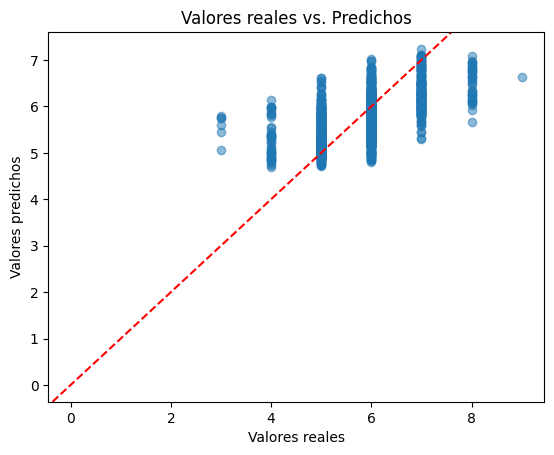

In [72]:
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Predichos")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Línea ideal
plt.show()

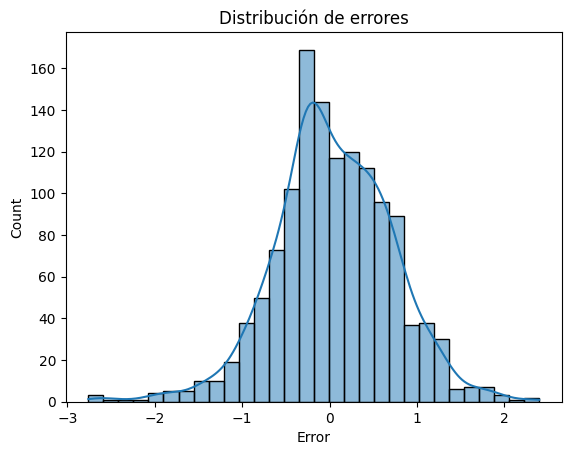

In [81]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


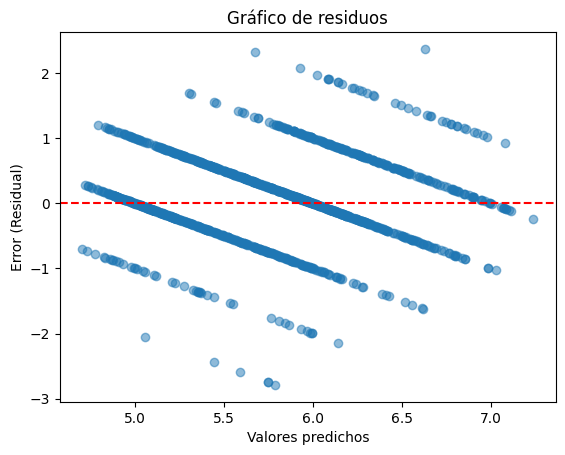

In [74]:
plt.scatter(y_pred_reg, errors, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Error (Residual)")
plt.title("Gráfico de residuos")
plt.show()